## Linear Regression

In [1]:
import torch

In [2]:
torch.__version__

'1.0.1.post2'

In [3]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

### Create Data

Text(0, 0.5, 'y')

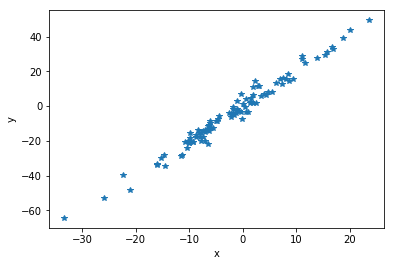

In [68]:
torch.manual_seed(1) #set the random seed to allow reproducibility
x = torch.randn(100, 1)*10 #shape, normal distribution
y = 2*x + 3*torch.randn(100, 1)
plt.plot(x.numpy(), y.numpy(), '*')
plt.xlabel('x')
plt.ylabel('y')

### Linear Model

In [72]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size) #number of input features, number of output features
    def forward(self, x):
        return self.linear(x)

In [89]:
torch.manual_seed(1) #random initialization of weights and biases
model = LR(1, 1)

In [74]:
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [81]:
model.parameters(), type(model.parameters())

(<generator object Module.parameters at 0x11f9a35e8>, generator)

In [90]:
for i in model.parameters(): #this is a generator
    print (i)

Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [104]:
w, b = model.parameters()

In [105]:
w, b

(Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True))

In [106]:
w[0]

tensor([0.5153], grad_fn=<SelectBackward>)

In [107]:
w[0][0]

tensor(0.5153, grad_fn=<SelectBackward>)

In [108]:
w[0][0].item()

0.5152631998062134

In [109]:
b[0]

tensor(-0.4414, grad_fn=<SelectBackward>)

In [110]:
b[0].item()

-0.44137823581695557

In [111]:
def get_params(): #to extract the values in the tensor object
    w, b = model.parameters()
    return w[0][0].item(), b[0].item()

In [114]:
def plot_fit(title):
    plt.title(title)
    w, b = get_params()
    x1 = np.array([-30, 30])
    y1 = w*x1+b
    plt.plot(x1, y1, 'r')
    plt.scatter(x, y)

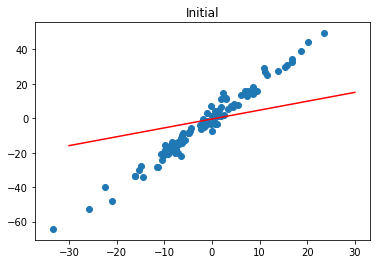

In [115]:
plot_fit('Initial')

In [116]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [117]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print ('epoch', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 loss: 240.73043823242188
epoch 1 loss: 230.84291076660156
epoch 2 loss: 221.37904357910156
epoch 3 loss: 212.32064819335938
epoch 4 loss: 203.65052795410156
epoch 5 loss: 195.35203552246094
epoch 6 loss: 187.40882873535156
epoch 7 loss: 179.80618286132812
epoch 8 loss: 172.5291748046875
epoch 9 loss: 165.5641632080078
epoch 10 loss: 158.89743041992188
epoch 11 loss: 152.5164337158203
epoch 12 loss: 146.40899658203125
epoch 13 loss: 140.56300354003906
epoch 14 loss: 134.9677276611328
epoch 15 loss: 129.61215209960938
epoch 16 loss: 124.4859390258789
epoch 17 loss: 119.5794906616211
epoch 18 loss: 114.88341522216797
epoch 19 loss: 110.38848114013672
epoch 20 loss: 106.08613586425781
epoch 21 loss: 101.96820068359375
epoch 22 loss: 98.02670288085938
epoch 23 loss: 94.25402069091797
epoch 24 loss: 90.64311981201172
epoch 25 loss: 87.18682098388672
epoch 26 loss: 83.8786392211914
epoch 27 loss: 80.71219635009766
epoch 28 loss: 77.68143463134766
epoch 29 loss: 74.7805404663086
epoch 

Text(0, 0.5, 'Loss')

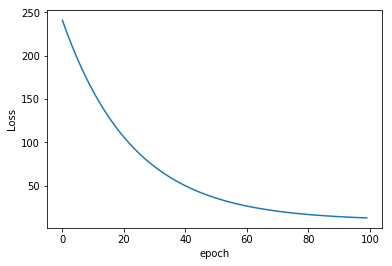

In [118]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('Loss')

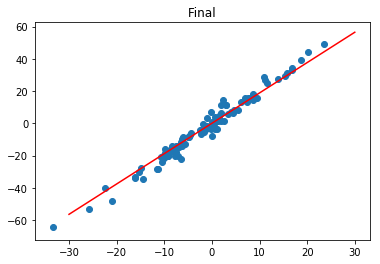

In [119]:
plot_fit('Final')